# 대한민국 대통령 취임식 연설문을 활용한 텍스트마이닝


*   각 대통령의 연설문 특징 분석
*   가장 많이 언급된 단어는?
*   정치색(보수/진보) 성향이 담겨있는가?
*   가장 중점을 두고 있는 분야나 대상을 찾을 수 있는가?



## 패키지 설치

In [1]:
!pip install konlpy # 자연어 처리
!pip install koreanize-matplotlib # 한굴
!pip install wordcloud # 시각화

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.3 MB/s eta 0:00:00


## 라이브러리 import

In [2]:
import pandas as pd
import re

import konlpy

import matplotlib.pyplot as plt # 차드
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비하기

In [3]:
# https://www.pa.go.kr/research/contents/speech/index.jsp
# https://www.korea.kr/news/policyNewsView.do?newsId=148901469

yoon = open('/content/윤석열대통령_연설문.txt').read()
yoon

'존경하고 사랑하는 국민 여러분,\n750만 재외동포 여러분,\n그리고 자유를 사랑하는 세계 시민 여러분,\n\n저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고, 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다.\n\n역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다.\n\n문재인, 박근혜 전 대통령, 그리고 할리마 야콥 싱가포르 대통령, 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령, 왕치산 중국 국가부주석, 메가와티 수카르노푸트리 인도네시아 전 대통령, 더글러스 엠호프 해리스 미국 부통령 부군, 조지 퓨리 캐나다 상원의장, 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다.\n\n이 자리를 빌려 지난 2년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.\n그리고 헌신해주신 의료진 여러분께도 감사드립니다.\n\n존경하는 국민 여러분,\n세계 시민 여러분,\n\n지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편, 기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로,\xa0 또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다.\n\n다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다.\n\n또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업, 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다.\n\n한편, 이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다.\n\n가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다.\n\n견해가 다른 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다.\n그것이 민주주의를 지탱하는 합리주의와 지성주의입니

## 데이터 전처리

### 특수기호 및 html tag(줄 바꿈\n), 숫자 등을 삭제

In [4]:
# yoon = re.sub('[^가-힣0-9]', ' ', moon) ->  ^ = not , 정규식, 한글과 숫자를 제외한 나머지를 지워라!
yoon = re.sub('[^가-힣]', ' ', yoon)
yoon

'존경하고 사랑하는 국민 여러분     만 재외동포 여러분  그리고 자유를 사랑하는 세계 시민 여러분   저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고  국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다   역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다   문재인  박근혜 전 대통령  그리고 할리마 야콥 싱가포르 대통령  포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령  왕치산 중국 국가부주석  메가와티 수카르노푸트리 인도네시아 전 대통령  더글러스 엠호프 해리스 미국 부통령 부군  조지 퓨리 캐나다 상원의장  하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다   이 자리를 빌려 지난  년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다  그리고 헌신해주신 의료진 여러분께도 감사드립니다   존경하는 국민 여러분  세계 시민 여러분   지금 전 세계는 팬데믹 위기  교역 질서의 변화와 공급망의 재편  기후 변화  식량과 에너지 위기  분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로   또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다   다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다   또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업  양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다   한편  이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다   가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다   견해가 다른 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다  그것이 민주주의를 지탱하는 합리주의와 지성주의입니다   국가 간  국가 내부의 지나친 집단적 갈등에 의

### 명사 단어 추출

In [5]:
# Komoran, Hannanum, Kkma
hannanum = konlpy.tag.Hannanum()
h_yoon_nn = hannanum.nouns(yoon)
h_yoon_nn

['존경',
 '사랑',
 '국민',
 '여러분',
 '재외동포',
 '여러분',
 '자유',
 '사랑',
 '세계',
 '시민',
 '여러분',
 '저',
 '나라',
 '자유민주주의',
 '시장경제',
 '체제',
 '기반',
 '국민',
 '진정한',
 '주인',
 '나라',
 '재건',
 '국제사회',
 '책',
 '역할',
 '나라',
 '시대적',
 '소명',
 '오늘',
 '자리',
 '역사적',
 '자리',
 '국민',
 '여러분',
 '문재',
 '박근혜',
 '전',
 '대통령',
 '리',
 '야콥',
 '싱가포르',
 '대통령',
 '포스탱',
 '아르샹쥬',
 '투아데라',
 '중앙아프리카공화국',
 '대통령',
 '왕치산',
 '중국',
 '국가부주석',
 '메가와티',
 '수카르노푸트리',
 '인도네시아',
 '전',
 '대통령',
 '더글러스',
 '엠호프',
 '해리스',
 '미국',
 '부통령',
 '부',
 '조',
 '퓨리',
 '상원의장',
 '하야시',
 '요시마사',
 '일본',
 '외무상',
 '비롯',
 '세계',
 '각국',
 '경축',
 '사절',
 '내외',
 '귀빈',
 '여러분',
 '자리',
 '년',
 '코',
 '팬데믹',
 '극복',
 '과정',
 '고통',
 '감내',
 '국민',
 '여러분',
 '경의',
 '표',
 '헌신',
 '의료진',
 '여러분',
 '존경',
 '국민',
 '여러분',
 '세계',
 '시민',
 '여러분',
 '전',
 '세계',
 '팬데믹',
 '위',
 '교역',
 '질',
 '변화',
 '공급망',
 '재편',
 '기후',
 '변화',
 '식량',
 '에너지',
 '위',
 '분쟁',
 '평화적',
 '해결',
 '후퇴',
 '등',
 '한',
 '나라',
 '독자적',
 '몇몇',
 '참여해서',
 '해결',
 '난제들',
 '직면',
 '다양',
 '위',
 '복합적',
 '인류',
 '사회',
 '그림자',
 '것',
 '우리나라',
 '비롯',
 '나라들',

In [6]:
# Komoran, Hannanum, Kkma
komoran = konlpy.tag.Komoran() # 더 디테일하게 명사를 찾음
k_yoon_nn = komoran.nouns(yoon) # yoon 이라는 텍스트에서 명사를 추출하여 리스트로 반환하는 함수 -> nouns
k_yoon_nn

['존경',
 '사랑',
 '국민',
 '여러분',
 '재외',
 '동포',
 '여러분',
 '자유',
 '사랑',
 '세계',
 '시민',
 '여러분',
 '나라',
 '자유민주주의',
 '시장',
 '경제 체제',
 '기반',
 '국민',
 '주인',
 '나라',
 '재건',
 '국제',
 '사회',
 '책임',
 '역할',
 '나라',
 '시대',
 '소명',
 '오늘',
 '자리',
 '역사',
 '자리',
 '국민',
 '감사',
 '문재인',
 '박근혜',
 '대통령',
 '리마',
 '싱가포르',
 '대통령',
 '포',
 '스탱',
 '아르',
 '샹',
 '쥬',
 '투',
 '아',
 '데',
 '중앙아프리카',
 '공화국',
 '대통령',
 '왕치산',
 '중국',
 '국가',
 '부주석',
 '메가와티 수카르노푸트리',
 '인도네시아',
 '대통령',
 '더글러스',
 '해리스',
 '미국',
 '부통령',
 '부군',
 '조지',
 '퓨리',
 '캐나다 상원',
 '의장',
 '하야시 요시마사',
 '일본',
 '외무상',
 '세계',
 '각국',
 '경축',
 '사절',
 '내외',
 '귀빈',
 '감사',
 '자리',
 '년',
 '간',
 '코로나',
 '팬데믹',
 '극복',
 '과정',
 '고통',
 '감내',
 '해주시',
 '국민',
 '경의',
 '헌신',
 '해주시',
 '의료진',
 '감사',
 '존경',
 '국민',
 '여러분',
 '세계',
 '시민',
 '여러분',
 '세계',
 '팬데믹',
 '위기',
 '교역',
 '질서',
 '변화',
 '공급',
 '망',
 '재편',
 '기후 변화',
 '식량',
 '에너지',
 '위기',
 '분쟁',
 '평화',
 '해결',
 '후퇴',
 '등',
 '나라',
 '독자',
 '나라',
 '참여',
 '해결',
 '난제',
 '직면',
 '위기',
 '복합',
 '인류',
 '사회',
 '그림자',
 '것',
 '우리나라',
 '나라',
 '국내',
 '성장',
 '규모'

### 데이터 프레임으로 변환

In [7]:
h_word_df = pd.DataFrame({'word': h_yoon_nn})
h_word_df

,word
0,존경
1,사랑
2,국민
3,여러분
4,재외동포
...,...
591,나라
592,위대한
593,국민
594,여러분


In [8]:
k_word_df = pd.DataFrame({'word': k_yoon_nn})
k_word_df

,word
0,존경
1,사랑
2,국민
3,여러분
4,재외
...,...
563,존경
564,나라
565,국민
566,여러분


### 단어수 파생변수 만들기

In [9]:
h_word_df['count'] = h_word_df['word'].str.len()
h_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,재외동포,4
...,...,...
591,나라,2
592,위대한,3
593,국민,2
594,여러분,3


In [10]:
k_word_df['count'] = k_word_df['word'].str.len()
k_word_df

,word,count
0,존경,2
1,사랑,2
2,국민,2
3,여러분,3
4,재외,2
...,...,...
563,존경,2
564,나라,2
565,국민,2
566,여러분,3


### 두글자 이상 단어만 남기고 삭제 (한단어 삭제)

In [11]:
h_word_df = h_word_df.query('count >= 2')

In [12]:
k_word_df = k_word_df.query('count >= 2')

### 단어의 사용 빈도표 (사용 빈도순으로 정렬)

In [13]:
h_word_df = h_word_df.groupby('word', as_index = False).agg(n=('word', 'count')).sort_values('n', ascending = False) # 빈도순 기준으로 정렬 -> n
h_word_df

,word,n
180,자유,30
148,여러분,16
34,국민,15
132,시민,15
160,우리,14
...,...,...
106,불법,1
109,빈곤,1
112,사실만,1
113,사절,1


In [14]:
k_word_df = k_word_df.groupby('word', as_index = False).agg(n=('word', 'count')).sort_values('n', ascending = False) # 빈도순 기준으로 정렬 -> n
k_word_df

,word,n
170,자유,32
128,시민,15
33,국민,15
119,세계,13
141,여러분,12
...,...,...
98,부주석,1
99,부통령,1
101,분리,1
102,분쟁,1


### 단어 빈도 상위 20개 추출

In [15]:
h_top20 = h_word_df.head(20)
k_top20 = k_word_df.head(20)

## 단어 빈도 시각화

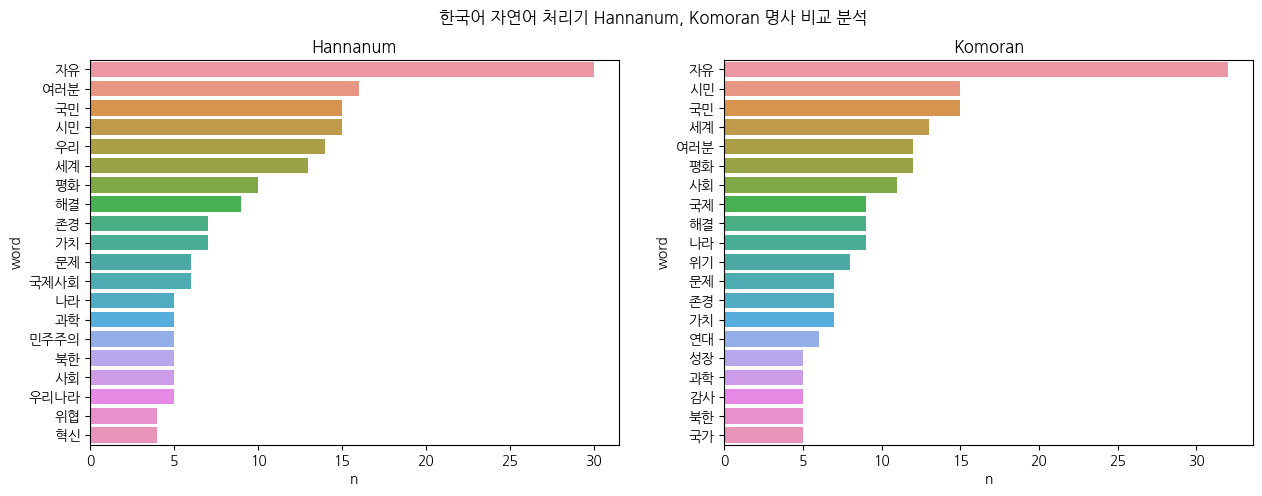

In [16]:
# 2개의 그래프(Hannanum, Komoran) 한번에 표현하기

fig, axes = plt.subplots(1,2, figsize =(15,5)) # 하나의 로우에 두개의 칼럼
plt.suptitle('한국어 자연어 처리기 Hannanum, Komoran 명사 비교 분석')

sns.barplot(data = h_top20, x = 'n', y = 'word', ax = axes[0])
axes[0].set_title('Hannanum')

sns.barplot(data = k_top20, x = 'n', y = 'word', ax = axes[1])
axes[1].set_title('Komoran')

plt.show()

## 워드클라우드 시각화

### 한글 폰트 설정

In [17]:
font_path = '/content/BMDOHYEON_ttf.ttf'

### 단어와 빈도를 담은 딕셔너리 만들기

In [18]:
k_word_dic = k_word_df.set_index('word').to_dict()['n']
k_word_dic

{'자유': 32,
 '시민': 15,
 '국민': 15,
 '세계': 13,
 '여러분': 12,
 '평화': 12,
 '사회': 11,
 '국제': 9,
 '해결': 9,
 '나라': 9,
 '위기': 8,
 '문제': 7,
 '존경': 7,
 '가치': 7,
 '연대': 6,
 '성장': 5,
 '과학': 5,
 '감사': 5,
 '북한': 5,
 '국가': 5,
 '민주주의': 5,
 '우리나라': 5,
 '번영': 4,
 '기술': 4,
 '대통령': 4,
 '인권': 4,
 '위협': 4,
 '국내': 4,
 '역할': 4,
 '혁신': 4,
 '갈등': 4,
 '경제': 4,
 '사랑': 3,
 '모두': 3,
 '보편': 3,
 '한반도': 3,
 '기반': 3,
 '자리': 3,
 '책임': 3,
 '극복': 3,
 '생각': 3,
 '지속': 3,
 '확대': 3,
 '공정': 3,
 '양극': 3,
 '역사': 3,
 '자유민주주의': 3,
 '해주시': 2,
 '존엄': 2,
 '정치': 2,
 '존중': 2,
 '방향': 2,
 '주도': 2,
 '보장': 2,
 '구성원': 2,
 '비핵화': 2,
 '사람': 2,
 '도약': 2,
 '협력': 2,
 '인해': 2,
 '인류': 2,
 '개인': 2,
 '개발': 2,
 '시장': 2,
 '아시아': 2,
 '주인': 2,
 '반지성주의': 2,
 '기대': 2,
 '진실': 2,
 '기회': 2,
 '난제': 2,
 '풍요': 2,
 '과정': 2,
 '공동체': 2,
 '팬데믹': 2,
 '침해': 2,
 '인식': 1,
 '인도네시아': 1,
 '캐나다 상원': 1,
 '혼자': 1,
 '추구': 1,
 '충족': 1,
 '의장': 1,
 '일본': 1,
 '일시': 1,
 '입장': 1,
 '창의': 1,
 '참여': 1,
 '코로나': 1,
 '중단': 1,
 '의료진': 1,
 '자세': 1,
 '필요': 1,
 '획기적': 1,
 '오늘': 1,
 '와해': 1,
 '왕

### 워드 클라우드 만들기

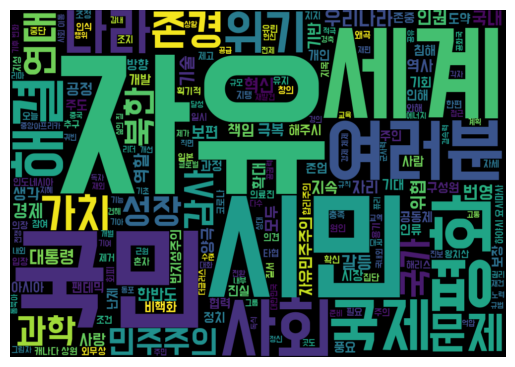

In [19]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=700, font_path=font_path)
img_wordcloud = wc.generate_from_frequencies(k_word_dic)

plt.axis('off') # 눈끔선을 그리지 마
plt.imshow(img_wordcloud, interpolation='bilinear') # 이미지 형태 그려라
plt.show()

### mask를 활용한 워드클라우드 시각화

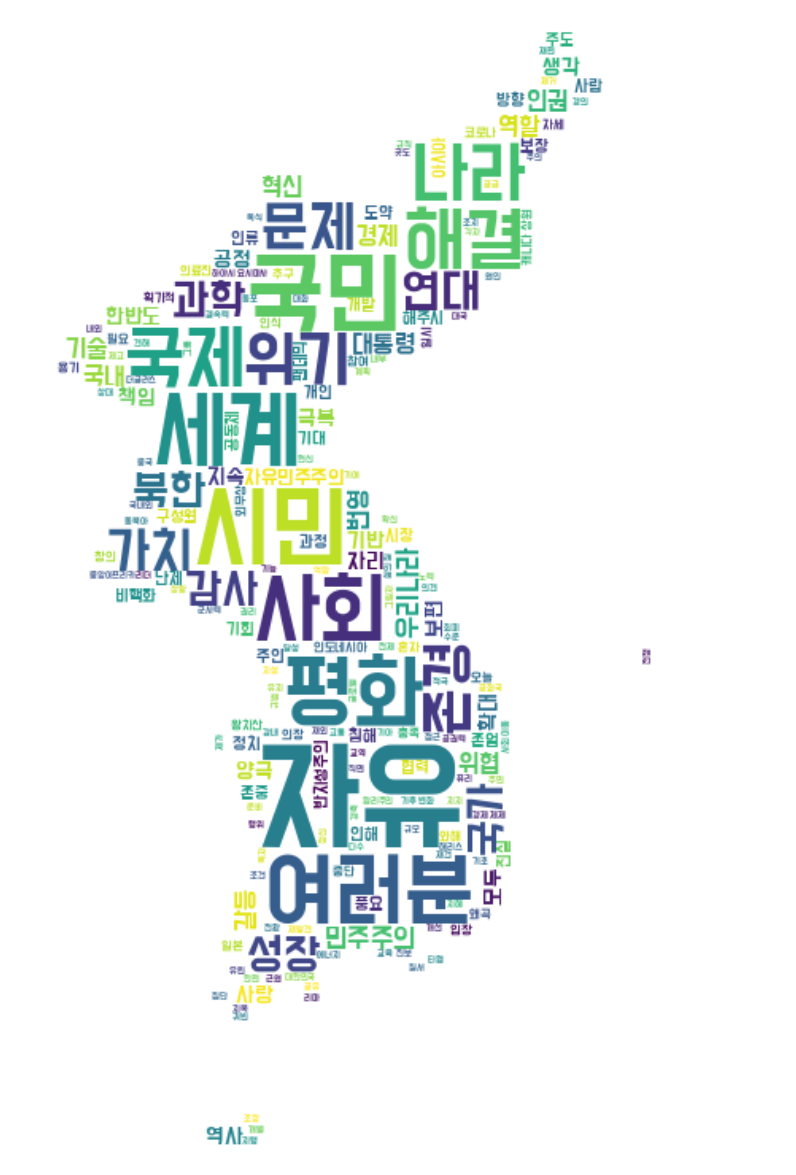

In [20]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

# 이미지 불러오기
icon = Image.open('/content/korea_mask.jpg')

# 이미지를 numpy array로 만들기
korea_mask = np.array(icon)

# 워드 클라우드 만들기
wc = WordCloud(background_color='white', width=1000, height=700, font_path=font_path, mask=korea_mask)
img_wordcloud = wc.generate_from_frequencies(k_word_dic)

plt.figure(figsize =(25, 15))
plt.axis('off') # 눈끔선을 그리지 마-
plt.imshow(img_wordcloud, interpolation='bilinear') # 이미지 형태 그려라
plt.show()

### 워드클라우드 이미지 저장

In [21]:
img_wordcloud.to_file(filename= 'yoon_wordcloud.png')

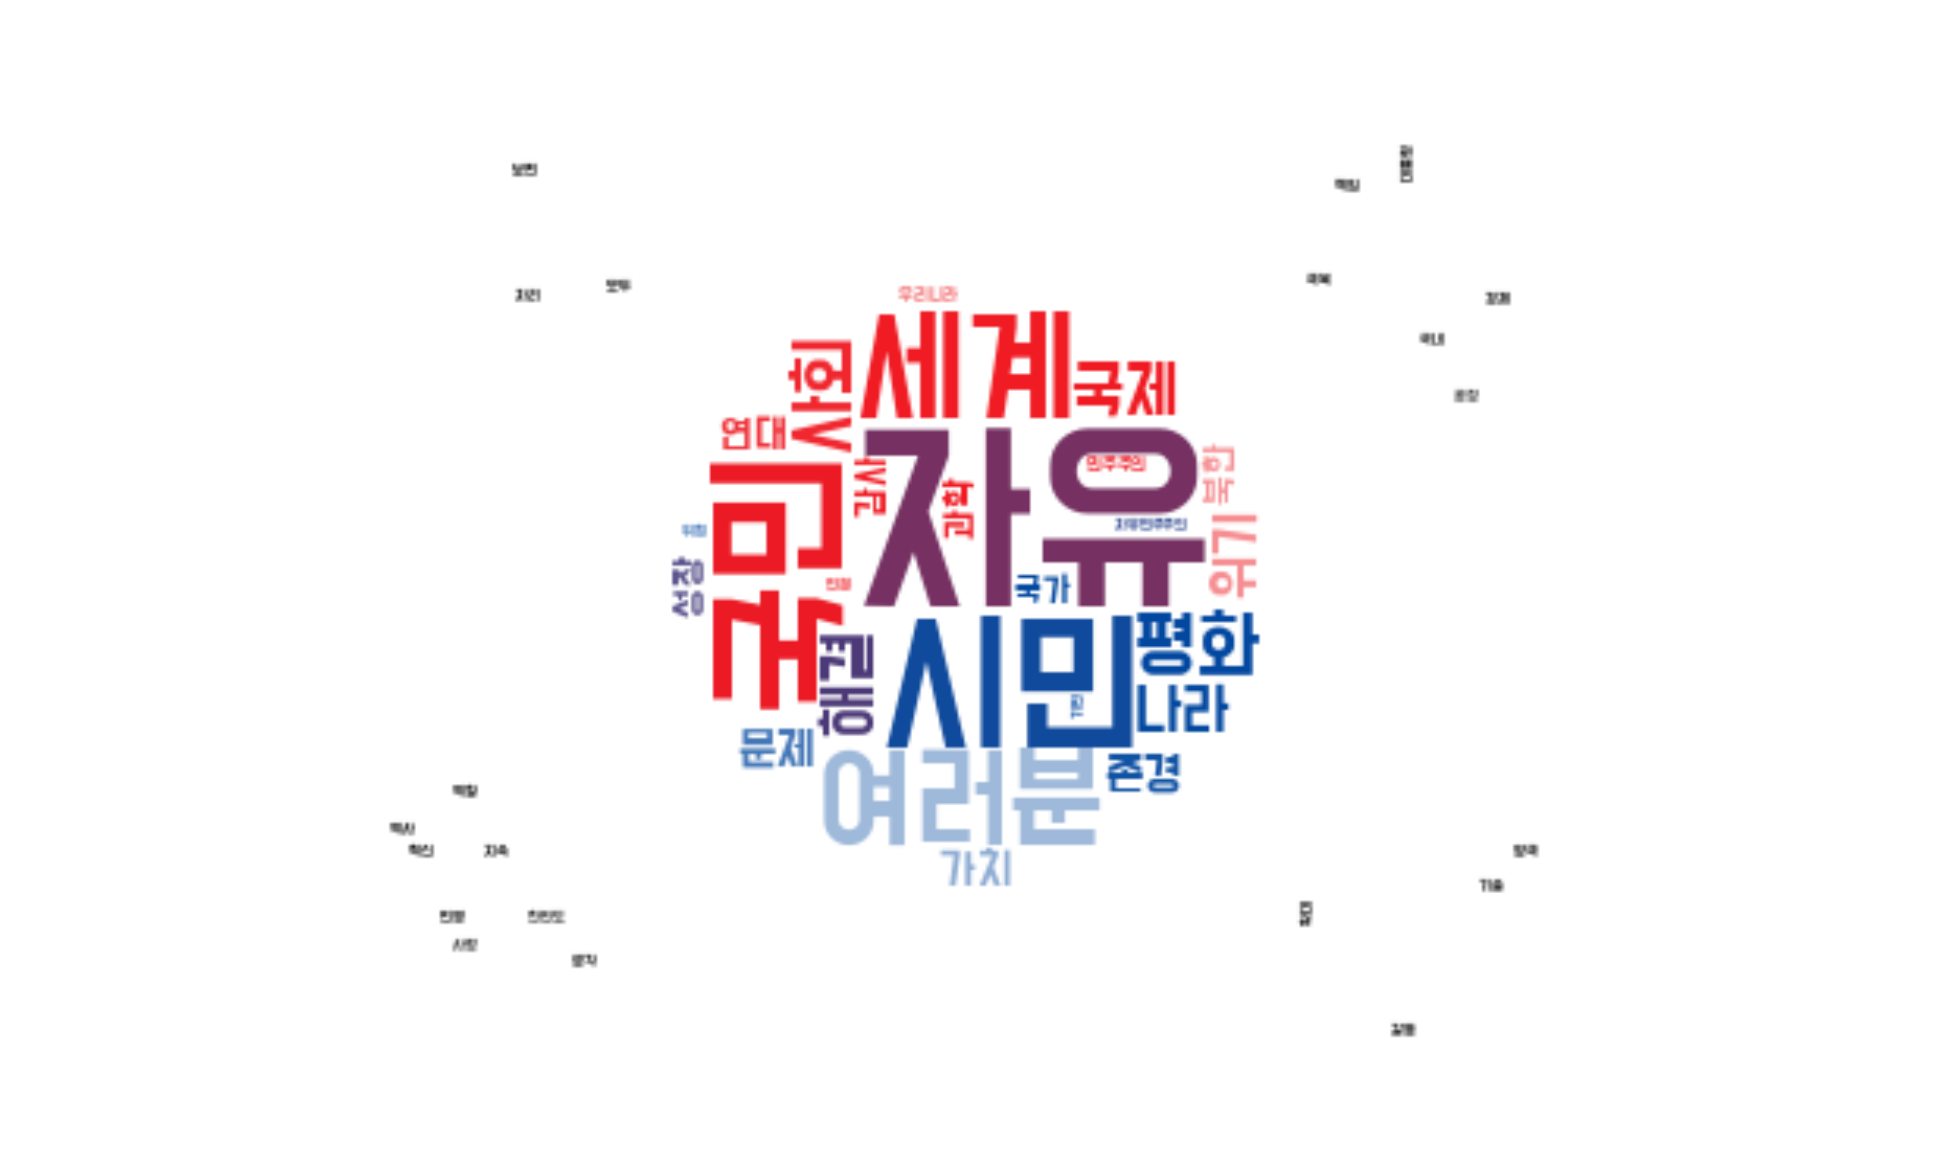

In [22]:
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator

# 이미지 불러오기
icon = Image.open('/content/wordcloud_ver2.jpg')

# 이미지를 numpy array로 만들기
korea_mask = np.array(icon)

# 워드 클라우드 만들기
wc = WordCloud(background_color='white', width=1000, height=700, font_path=font_path, mask=korea_mask)
img_wordcloud = wc.generate_from_frequencies(k_word_dic)

image_colors = ImageColorGenerator(korea_mask)
wordcloud = img_wordcloud.recolor(color_func=image_colors)

plt.figure(figsize =(25, 15))
plt.axis('off') # 눈끔선을 그리지 마
plt.imshow(img_wordcloud, interpolation='bilinear') # 이미지 형태 그려라
plt.show()

In [24]:
img_wordcloud.to_file(filename= 'yoon_wordcloud_ver2.png')